In [5]:
#Import all the dependencies
## https://medium.com/@mishra.thedeepak/doc2vec-simple-implementation-example-df2afbbfbad5
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

import json
import statistics
from sklearn.decomposition import PCA
import numpy as np


%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns; sns.set()

In [6]:
#data = ["I love machine learning. Its awesome.",
#        "I love coding in python",
#        "I love building chatbots",
#        "they chat amagingly well"]

TOPIC_FILE = 'paper_topic_terms_2.json'
KEY_FILE = 'paper_keys.json'

processed_docs = json.load(open(TOPIC_FILE, 'r'))
papers = json.load(open(KEY_FILE, 'r'))


#tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(data)]
tagged_data = [TaggedDocument(words=_d, tags=[str(i)]) for i, _d in enumerate(processed_docs)]

print(tagged_data[0])

TaggedDocument(['benchmark', 'generic', 'product', 'detection', 'strong', 'baseline', 'dense', 'object', 'detection', 'srikrishna', 'varadarajan', 'sonaal', 'kant', 'muktabh', 'mayank', 'srivastava', 'srikrishna', 'sonaal', 'muktabh', 'paralleldots.com', 'paralleldots', 'inc.', 'keywords', 'dense', 'object', 'detection', 'grocery', 'products', 'retail', 'products', 'benchmark', 'generic', 'detection', 'abstract', 'object', 'detection', 'densely', 'pack', 'scenes', 'area', 'standard', 'object', 'detectors', 'fail', 'train', 'goldman', 'performance', 'standard', 'object', 'detectors', 'densely', 'pack', 'scenes', 'superior', 'train', 'normal', 'scenes', 'dense', 'scenes', 'train', 'standard', 'object', 'detector', 'small', 'normally', 'pack', 'dataset', 'data', 'augmentation', 'techniques', 'achieve', 'signicantly', 'better', 'result', 'state-of-the-art', 'methods', 'train', 'densely', 'pack', 'scenes', 'obtain', 'sku110k', 'dataset', 'goldman', 'higher', '1.4x', 'better', 'previous', 's

In [3]:
max_epochs = 100
vec_size = 128
alpha = 0.025

model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_data)

model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)

'''
for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
print("Model Saved")
'''


/Users/daniel/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  from ipykernel import kernelapp as app


'\nfor epoch in range(max_epochs):\n    print(\'iteration {0}\'.format(epoch))\n    model.train(tagged_data,\n                total_examples=model.corpus_count,\n                epochs=model.iter)\n    # decrease the learning rate\n    model.alpha -= 0.0002\n    # fix the learning rate, no decay\n    model.min_alpha = model.alpha\n\nmodel.save("d2v.model")\nprint("Model Saved")\n'

In [52]:
doc_vecs = []
#for doc in enumerate(model.docvecs):
#    doc_vecs.append(doc)
    
for key in model.docvecs.doctags.keys():
    doc_vecs.append(model.docvecs[key])

In [4]:
print(list(model.docvecs))

KeyError: "tag '1066' not seen in training corpus/invalid"

In [57]:
import math
standard_doc_vecs = []

for doc in doc_vecs:
    standard_doc_vecs.append(doc/abs(doc))

In [30]:
#to find the vector of a document which is not in training data
#test_data = word_tokenize("I love chatbots".lower())
#v1 = model.infer_vector(test_data)
#print("V1_infer", v1)

# to find most similar doc using tags
print(json.dumps(papers[1], indent=4))

similar_doc = model.docvecs.most_similar('1')
for doc in similar_doc:
    print("%s: %.2f" % doc)
    print(json.dumps(papers[int(doc[0])], indent=4))


# to find vector of doc in training data using tags or in other words, printing the vector of document at index 1 in training data
#print(model.docvecs['1'])

{
    "file": "./arxiv_cs/Cache-Aided Content Delivery in Fog-RAN Systems with Topological  Information and no CSI.pdf",
    "url": "https://arxiv.org/pdf/1912.09467",
    "title": "Cache-Aided Content Delivery in Fog-RAN Systems with Topological  Information and no CSI\n",
    "subjects": [
        "Information Theory (cs.IT)\n"
    ]
}
264: 0.90
{
    "file": "./arxiv_cs/Robust Baseband Compression Against Congestion in Packet-Based Fronthaul  Networks Using Multiple Description Coding.pdf",
    "url": "https://arxiv.org/pdf/1912.08520",
    "title": "Robust Baseband Compression Against Congestion in Packet-Based Fronthaul  Networks Using Multiple Description Coding\n",
    "subjects": [
        "Information Theory (cs.IT)",
        "Signal Processing (eess.SP)\n\n"
    ]
}
721: 0.87
{
    "file": "./arxiv_cs/Multi-User Opportunistic Beamforming using Reconfigurable Surfaces.pdf",
    "url": "https://arxiv.org/pdf/1912.07063",
    "title": "Multi-User Opportunistic Beamforming using 

In [33]:
topics = []

for file in papers:
    for topic in file["subjects"]:

        topic = topic.replace('\n', '')

        if topic not in topics:
            topics.append(topic)


for paper in papers:
    paper["colours"] = []
    
    for i, topic in enumerate(topics):
        for subject in paper["subjects"]:
            if subject.replace('\n', '') == topic:
                paper["colours"].append(i)
                

colours = [statistics.mean(s) for s in [t["colours"] for t in papers]]

In [34]:
def plot_3d_scatter(vecs, colours):
    pca = PCA(3)  # project from 64 to 2 dimensions
    projected = pca.fit_transform(vecs)

    cm = plt.cm.get_cmap('RdYlBu')
    fig = plt.figure(figsize=(20,20))

    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(projected[:, 0], projected[:, 1], projected[:, 2],
               c=colours,
               cmap=cm)

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label') 
    #ax.set_zlim(-2,2)
    
    # set axes range
    #plt.xlim(-3, 3)
    #plt.ylim(-3, 3)
    plt.show();

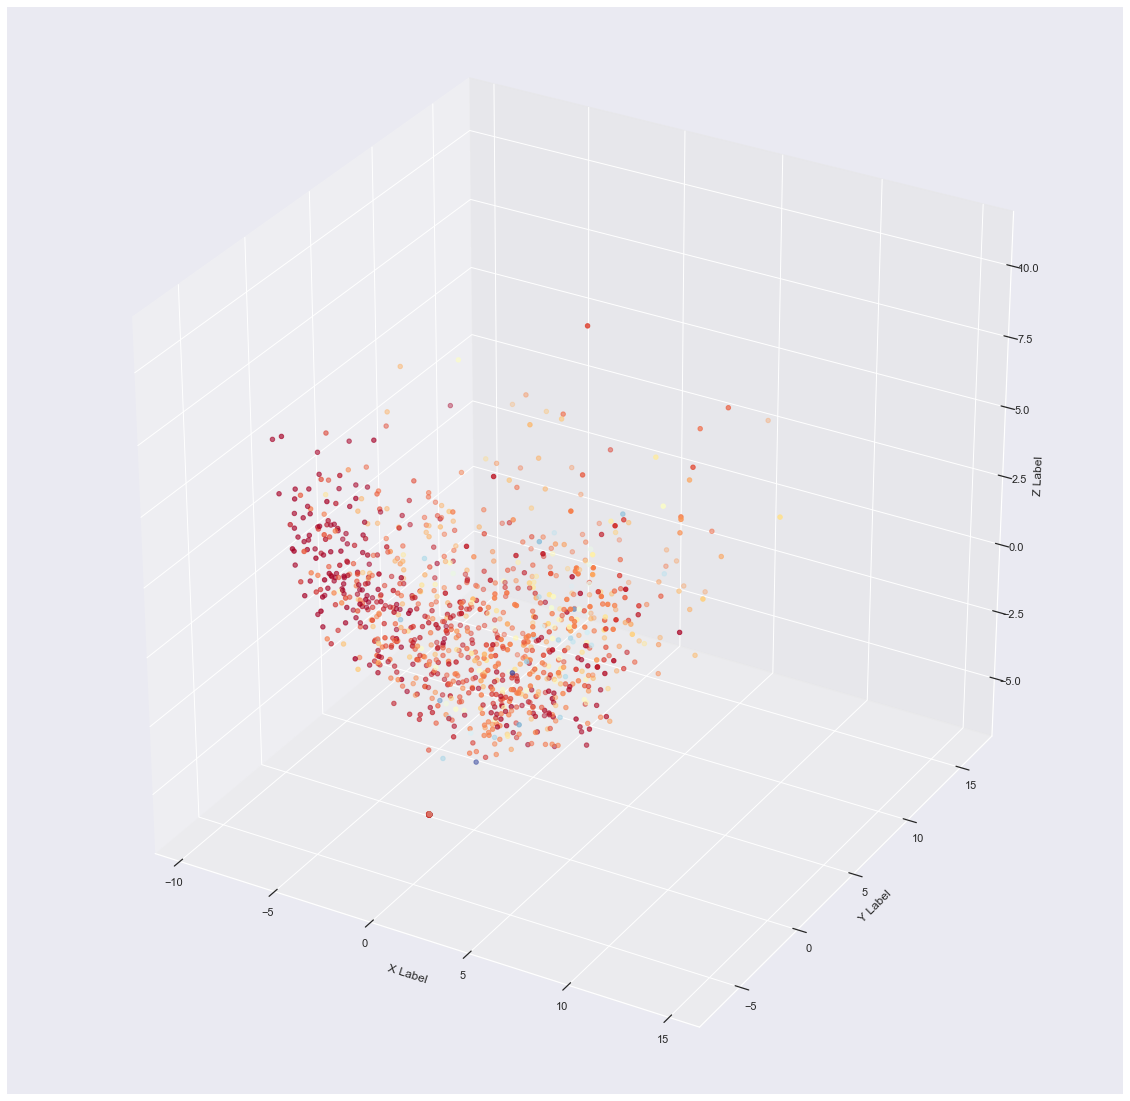

In [53]:
plot_3d_scatter(doc_vecs, colours)

In [58]:
plot_3d_scatter(standard_doc_vecs, colours)